<center><h1>Tugas Bonus</h1></center>

<center><h2>Sains Data Genap 2020/2021</h2></center>

In [27]:
#Input NPM
Nama = "Naufal Hilmi Irfandi"

#Input NPM
NPM = "1806186673"

#Kode Asdos
Kode_Asdos = "MR"

#Referensi
Referensi = ['https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html', 
             'https://scikit-learn.org/stable/modules/naive_bayes.html', 
             'https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html#sklearn.naive_bayes.CategoricalNB', 
             'https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html', 
             'https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html']

In [29]:
from collections import Counter

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [4]:
data_fake_job = pd.read_csv('fake_job_postings.csv')

# Analisis Data

In [5]:
#Mendapatkan informasi mengenai type dan jumlah data not null dari setiap kolom data fake job

data_fake_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

Dari info diatas kita dapat mengetahui bahwa terdapat 18 attribut dan memiliki data berjumlah 17880 data pada fake job dataset.

In [6]:
# Melakukan pengecekan duplikasi data

print("Data duplikat pada dataset fake_job_postings:",data_fake_job.duplicated(keep=False).sum())

Data duplikat pada dataset fake_job_postings: 0


Dari hasil diatas terihat bahwa terdapat 816 data pada dataset games yang duplikat sedangkan pada dataset fake job tidak terdapat data yang duplikat.

In [7]:
#Cek missing value

def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

In [8]:
#Menggunakan method cek_null untuk data_fake_job dataframe

cek_null(data_fake_job)

                     Total   Percent
salary_range         15012  0.839597
department           11547  0.645805
required_education    8105  0.453300
benefits              7210  0.403244
required_experience   7050  0.394295
function              6455  0.361018
industry              4903  0.274217
employment_type       3471  0.194128
company_profile       3308  0.185011
requirements          2695  0.150727
location               346  0.019351
description              1  0.000056


Dari hasil diatas didapatkan bahwa pada dataset fake job memiliki beberapa attribute yang terdapat null didalamnya dengan attribute salary_range yang memiliki data null terbanyak yaitu 15012 atau berkisar 83% dari total data. Dalam mencari attribute yang berpengaruh terhadap target, perlu dicari attribute mana yang merupakan kategorik dikarenakan dalam menentukan hasil dari target dilihat dari kategori-kategori yang sudah terbentuk oleh attribute kategorik.

In [9]:
# Melihat attribute mana saja yang merupakan kategorik

data_fake_job.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

Jika kita lihat terdapat 7 buah attribute yang memiliki nilai uniqueness kurang dari 10 data yaitu attribut,
- telecommuting : 2 data unique
- has_company_logo : 2 data unique
- has_questions : 2 data unique
- employment_type : 5 data unique
- required_experience : 7 data unique

In [10]:
attr_fake_list = ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
                  'required_experience']

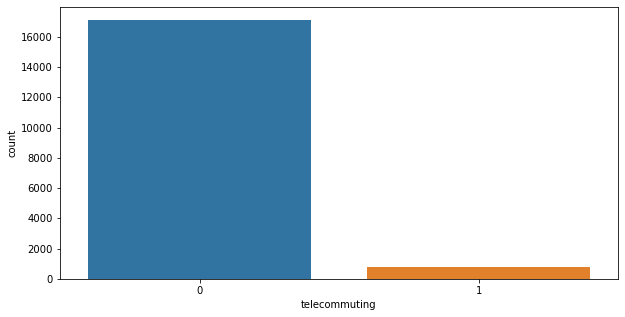

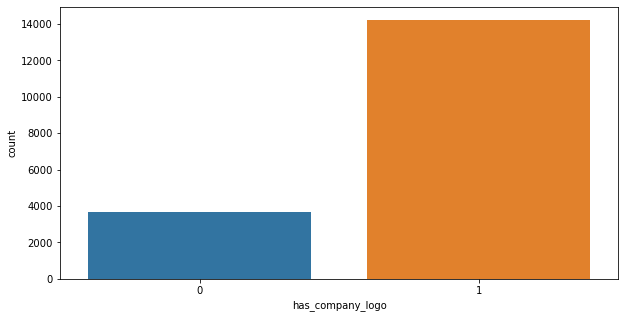

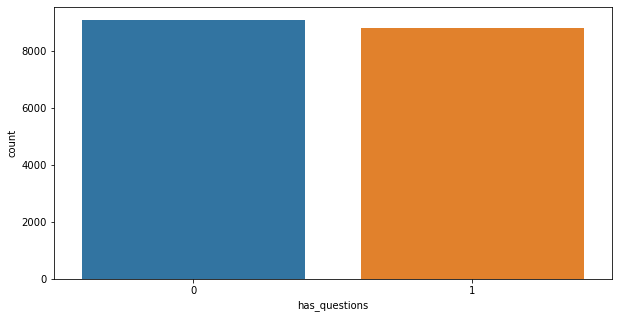

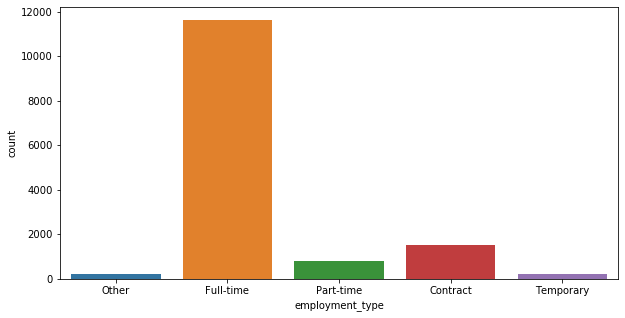

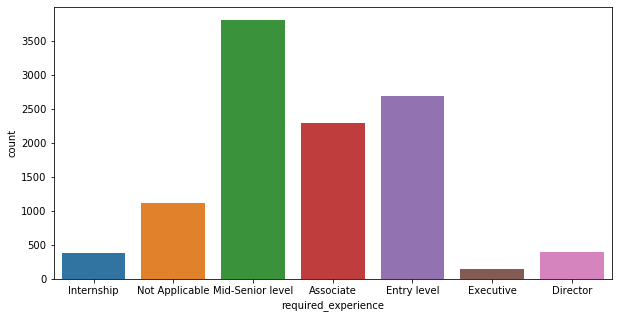

In [11]:
# Melihat histogram pada setiap attribute

for attr in attr_fake_list:
    plt.figure(figsize=(10,5))
    sns.countplot(x=attr, data=data_fake_job)
    plt.show()
    print()

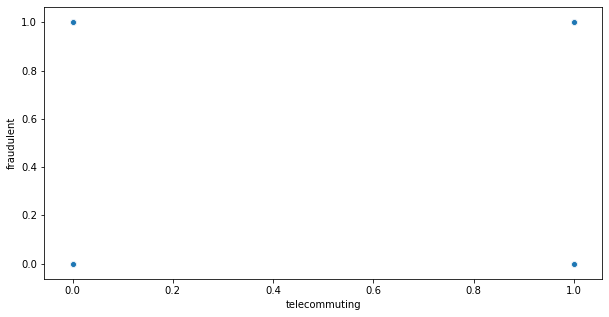

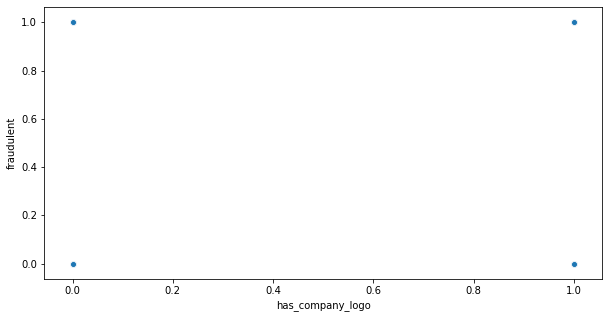

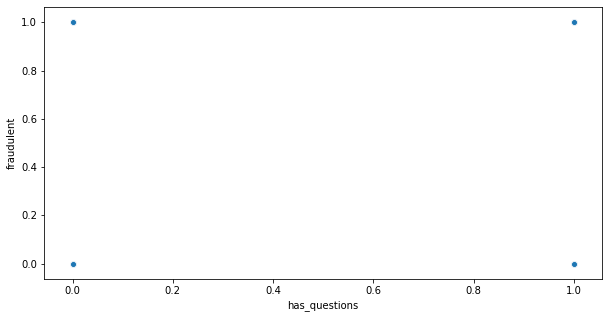

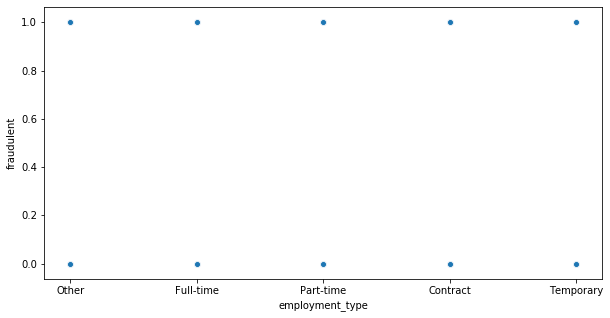

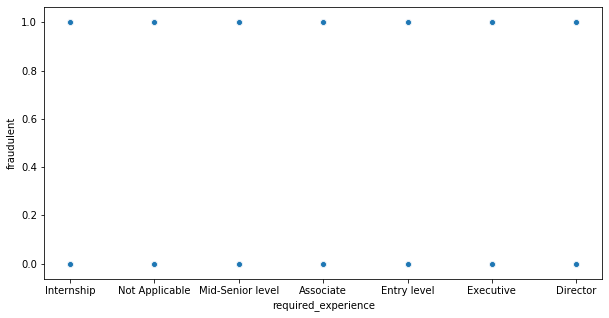

In [12]:
# Melihat keterhubungan dengan scatter plot

for attr in attr_fake_list:
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=data_fake_job[attr], y=data_fake_job['fraudulent'])
    plt.show()
    print()

Dari hasil analisis diatas, dapat disimpulkan bahwa terdapat beberapa attribute yang berpengaruh terhadap target dimana untuk data fake job terdapat 5 attribute sedangkan untuk data games terdapat 2 attribute. Attribute tersebut yaitu

Data Fake,
- telecommuting : 2 data unique
- has_company_logo : 2 data unique
- has_questions : 2 data unique
- employment_type : 5 data unique
- required_experience : 7 data unique

Pemilihan attribute ini dilihat dari attribute yang merupakan katagorikal attribute dimana attribute ini akan berpengaruh terhadap penentuan target.

# Preprocessing

#### Penghilangan data yang bukan kategorik

In [13]:
# Mengambil attribute yang memiliki nilai uniqueness kecil

data_fake_job.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

In [14]:
attr_unique = ['job_id', 'title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 
               'benefits', 'required_education', 'industry', 'function']
data_fake_job_kategorik = data_fake_job.drop(attr_unique, axis=1)
data_fake_job_kategorik

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,fraudulent
0,0,1,0,Other,Internship,0
1,0,1,0,Full-time,Not Applicable,0
2,0,1,0,NaN,NaN,0
3,0,1,0,Full-time,Mid-Senior level,0
4,0,1,1,Full-time,Mid-Senior level,0
...,...,...,...,...,...,...
17875,0,1,1,Full-time,Mid-Senior level,0
17876,0,1,1,Full-time,Mid-Senior level,0
17877,0,0,0,Full-time,NaN,0
17878,0,0,1,Contract,Not Applicable,0


#### Penggantian nilai null pada data kategorik dengan object "Undefined"

In [15]:
data_fake_job_kategorik = data_fake_job_kategorik.fillna("Undefined")
data_fake_job_kategorik

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,fraudulent
0,0,1,0,Other,Internship,0
1,0,1,0,Full-time,Not Applicable,0
2,0,1,0,Undefined,Undefined,0
3,0,1,0,Full-time,Mid-Senior level,0
4,0,1,1,Full-time,Mid-Senior level,0
...,...,...,...,...,...,...
17875,0,1,1,Full-time,Mid-Senior level,0
17876,0,1,1,Full-time,Mid-Senior level,0
17877,0,0,0,Full-time,Undefined,0
17878,0,0,1,Contract,Not Applicable,0


#### Memisahkan target dengan fitur

In [16]:
target_fake_job = data_fake_job_kategorik['fraudulent']
data_fake_job_kategorik = data_fake_job_kategorik.drop('fraudulent', axis=1)

In [17]:
pd.DataFrame(target_fake_job, columns=['fraudulent'])

,fraudulent
0,0
1,0
2,0
3,0
4,0
...,...
17875,0
17876,0
17877,0
17878,0


In [18]:
data_fake_job_kategorik

,telecommuting,has_company_logo,has_questions,employment_type,required_experience
0,0,1,0,Other,Internship
1,0,1,0,Full-time,Not Applicable
2,0,1,0,Undefined,Undefined
3,0,1,0,Full-time,Mid-Senior level
4,0,1,1,Full-time,Mid-Senior level
...,...,...,...,...,...
17875,0,1,1,Full-time,Mid-Senior level
17876,0,1,1,Full-time,Mid-Senior level
17877,0,0,0,Full-time,Undefined
17878,0,0,1,Contract,Not Applicable


#### Mengubah data yang awalnya kategorikal menjadi numerical menggunakan LabelEncoder

In [19]:
le = LabelEncoder()

for i in data_fake_job_kategorik:
    if data_fake_job_kategorik[i].dtypes == 'object':
        le.fit(list(data_fake_job_kategorik[i].values))
        data_fake_job_kategorik[i] = le.transform(list(data_fake_job_kategorik[i].values))

In [20]:
data_fake_job_kategorik

,telecommuting,has_company_logo,has_questions,employment_type,required_experience
0,0,1,0,2,4
1,0,1,0,1,6
2,0,1,0,5,7
3,0,1,0,1,5
4,0,1,1,1,5
...,...,...,...,...,...
17875,0,1,1,1,5
17876,0,1,1,1,5
17877,0,0,0,1,7
17878,0,0,1,0,6


# Process

## Process Classification Sebelum di Handle Imbalance Data

### Bentuk model

In [33]:
counter = Counter(target_fake_job)
print(counter)

Counter({0: 17014, 1: 866})


### Melakukan pembagian data train dan testing dimana 80% train dan 20% testing menggunakan train_test_split

In [156]:
x_train, x_test, y_train, y_test = train_test_split(data_fake_job_kategorik, target_fake_job, test_size = 0.2)

### Naive Bayes

In [157]:
# Categorial Naive Bayes

cnb = CategoricalNB()
cnb.fit(x_train, y_train)

CategoricalNB()

In [158]:
pred_test = cnb.predict(x_test)

In [159]:
print("ROC Score: {}".format(round(roc_auc_score(y_test, pred_test), 3)))

ROC Score: 0.5


### K-Nearest Neighbor

In [160]:
knn = KNeighborsClassifier(n_neighbors=12, p=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=12, p=1)

In [161]:
pred_test = knn.predict(x_test)

In [162]:
print("ROC Score: {}".format(round(roc_auc_score(y_test, pred_test), 3)))

ROC Score: 0.57


### SVC

In [163]:
clf = svm.SVC(C=0.1, gamma=1, kernel='linear')
clf.fit(x_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [164]:
pred_svm = clf.predict(x_test)

In [165]:
print("ROC Score: {}".format(round(roc_auc_score(y_test, pred_test), 3)))

ROC Score: 0.57


### LinearSVC

In [166]:
clf = svm.LinearSVC(C=0.001, tol=pow(10,-5), loss='hinge', max_iter=5000)
clf.fit(x_train, y_train)

LinearSVC(C=0.001, loss='hinge', max_iter=5000, tol=1e-05)

In [167]:
pred_lin_svm = clf.predict(x_test)

In [168]:
print("ROC Score: {}".format(round(roc_auc_score(y_test, pred_test), 3)))

ROC Score: 0.57


### Nilai ROC AUC

Naive Bayes:
- ROC Score: 0.5

KNN:
- ROC Score: 0.57

SVC:
- ROC Score: 0.57

LinearSVC
- ROC Score: 0.57

## Process Classification Sesudah di Handle Imbalance Data

In [169]:
data_fake_job_kategorik_2 = data_fake_job_kategorik.copy()
target_fake_job_2 = target_fake_job.copy()

## Teknik Smote (Over Sampling)

In [170]:
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(data_fake_job_kategorik_2, target_fake_job_2)

In [171]:
counter = Counter(y_over)
print(counter)

Counter({0: 17014, 1: 17014})


### Melakukan pembagian data train dan testing dimana 80% train dan 20% testing menggunakan train_test_split

In [172]:
x_train, x_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.2)

### Naive Bayes

In [173]:
# Categorial Naive Bayes

cnb = CategoricalNB()
cnb.fit(x_train, y_train)

CategoricalNB()

In [174]:
pred_test = cnb.predict(x_test)

In [175]:
print("ROC Score: {}".format(round(roc_auc_score(y_test, pred_test), 3)))

ROC Score: 0.737


### K-Nearest Neighbor

In [176]:
knn = KNeighborsClassifier(n_neighbors=12, p=1)
knn.fit(x_train, y_train)

pred_test = knn.predict(x_test)

In [177]:
print("ROC Score: {}".format(round(roc_auc_score(y_test, pred_test), 3)))

ROC Score: 0.782


### SVC

In [178]:
clf = svm.LinearSVC(C=0.001, tol=pow(10,-5), loss='hinge', max_iter=5000)
clf.fit(x_train, y_train)

pred_lin_svm = clf.predict(x_test)

In [179]:
print("ROC Score: {}".format(round(roc_auc_score(y_test, pred_test), 3)))

ROC Score: 0.782


### LinearSVC

In [180]:
clf = svm.LinearSVC(C=0.001, tol=pow(10,-5), loss='hinge', max_iter=5000)
clf.fit(x_train, y_train)

pred_lin_svm = clf.predict(x_test)

In [181]:
print("ROC Score: {}".format(round(roc_auc_score(y_test, pred_test), 3)))

ROC Score: 0.782


### Nilai ROC AUC SMOTE

Naive Bayes:
- ROC Score: 0.737

KNN:
- ROC Score: 0.782

SVC:
- ROC Score: 0.782

LinearSVC
- ROC Score: 0.782

## Teknik Near Miss (Under Sampling)

In [197]:
undersample = NearMiss(version=1, n_neighbors=3)
X_under, y_under = undersample.fit_resample(data_fake_job_kategorik_2, target_fake_job_2)

In [198]:
counter = Counter(y_under)
print(counter)

Counter({0: 866, 1: 866})


### Melakukan pembagian data train dan testing dimana 80% train dan 20% testing menggunakan train_test_split

In [199]:
x_train, x_test, y_train, y_test = train_test_split(X_under, y_under, test_size = 0.2)

### Naive Bayes

In [200]:
# Categorial Naive Bayes

cnb = CategoricalNB()
cnb.fit(x_train, y_train)

pred_test = cnb.predict(x_test)

print("ROC Score: {}".format(round(roc_auc_score(y_test, pred_test), 3)))

ROC Score: 0.734


### K-Nearest Neighbor

In [201]:
knn = KNeighborsClassifier(n_neighbors=12, p=1)
knn.fit(x_train, y_train)

pred_test = knn.predict(x_test)

print("ROC Score: {}".format(round(roc_auc_score(y_test, pred_test), 3)))

ROC Score: 0.757


### SVC

In [202]:
clf = svm.LinearSVC(C=0.001, tol=pow(10,-5), loss='hinge', max_iter=5000)
clf.fit(x_train, y_train)

pred_lin_svm = clf.predict(x_test)

print("ROC Score: {}".format(round(roc_auc_score(y_test, pred_test), 3)))

ROC Score: 0.757


### LinearSVC

In [203]:
clf = svm.LinearSVC(C=0.001, tol=pow(10,-5), loss='hinge', max_iter=5000)
clf.fit(x_train, y_train)

pred_lin_svm = clf.predict(x_test)

print("ROC Score: {}".format(round(roc_auc_score(y_test, pred_test), 3)))

ROC Score: 0.757


### Nilai ROC AUC NearMiss

Naive Bayes:
- ROC Score: 0.734

KNN:
- ROC Score: 0.757

SVC:
- ROC Score: 0.757

LinearSVC
- ROC Score: 0.757

## Teknik Smote ENN (Combine)

In [189]:
combine = SMOTEENN()
X_combine, y_combine = combine.fit_resample(data_fake_job_kategorik_2, target_fake_job_2)

In [190]:
counter = Counter(y_combine)
print(counter)

Counter({0: 10744, 1: 5207})


### Melakukan pembagian data train dan testing dimana 80% train dan 20% testing menggunakan train_test_split

In [191]:
x_train, x_test, y_train, y_test = train_test_split(X_combine, y_combine, test_size = 0.2)

### Naive Bayes

In [192]:
# Categorial Naive Bayes

cnb = CategoricalNB()
cnb.fit(x_train, y_train)

pred_test = cnb.predict(x_test)

print("ROC Score: {}".format(round(roc_auc_score(y_test, pred_test), 3)))

ROC Score: 0.933


### K-Nearest Neighbor

In [193]:
knn = KNeighborsClassifier(n_neighbors=12, p=1)
knn.fit(x_train, y_train)

pred_test = knn.predict(x_test)

print("ROC Score: {}".format(round(roc_auc_score(y_test, pred_test), 3)))

ROC Score: 0.997


### SVC

In [194]:
clf = svm.LinearSVC(C=0.001, tol=pow(10,-5), loss='hinge', max_iter=5000)
clf.fit(x_train, y_train)

pred_lin_svm = clf.predict(x_test)

print("ROC Score: {}".format(round(roc_auc_score(y_test, pred_test), 3)))

ROC Score: 0.997


### LinearSVC

In [195]:
clf = svm.LinearSVC(C=0.001, tol=pow(10,-5), loss='hinge', max_iter=5000)
clf.fit(x_train, y_train)

pred_lin_svm = clf.predict(x_test)

print("ROC Score: {}".format(round(roc_auc_score(y_test, pred_test), 3)))

ROC Score: 0.997


### Nilai ROC AUC SMOTEENN

Naive Bayes:
- ROC Score: 0.933

KNN:
- ROC Score: 0.997

SVC:
- ROC Score: 0.997

LinearSVC
- ROC Score: 0.997